In [1]:
import pingouin as pg
import psython as psy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None, "display.max_columns", None)

## Cronbach alpha, inter-item correlation, item-total correlation

In [4]:
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N = number of items
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R = inter-item correlation
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array called "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha, mean_r, N

In [5]:
def total_score(df):
    return df.sum(axis=1)

def total_var(df):
    return float(df.sum(axis=1).var(ddof=1))

def ItemTotalCorrelation(df):
    stat_without_item = pd.Series(index=df.columns, name='Item Total Correlation')
    for item in df.columns:
        total_deitemed = total_score(df) - df[item]
        stat_without_item.loc[item] = df[item].corr(total_deitemed)
    return stat_without_item

## 2016 and 2016 themes (sections)

In [6]:
df_all = pd.read_csv('data/acute/2016_acute_questions.csv')
df_all = df_all.drop(columns = ['organisation_name', 'organisation_id'], axis=1).fillna(df_all.mean())

<ipython-input-6-6fe6b02106d4>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_all = df_all.drop(columns = ['organisation_name', 'organisation_id'], axis=1).fillna(df_all.mean())


In [7]:
cronbach_alpha(df_all)

(0.9676337665668289, 0.19054865269706694, 127)

In [8]:
df_all_17 = pd.read_csv('data/acute/2017_acute_questions.csv')
df_all_17 = df_all_17.drop(columns = ['organisation_name', 'organisation_id'], axis=1).fillna(df_all_17.mean())

<ipython-input-8-e4aea7f502e3>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_all_17 = df_all_17.drop(columns = ['organisation_name', 'organisation_id'], axis=1).fillna(df_all_17.mean())


In [9]:
cronbach_alpha(df_all_17)

(0.9683150593926716, 0.1587069899183278, 162)

In [10]:
##themes

In [11]:
df_themes = pd.read_csv('data/acute/2016_acute_themes.csv')
df_readiness = df_themes[['strategic_alignment', 'leadership', 'resourcing', 'governance', 'information_governance']]
df_capabilities = df_themes[['asset_resource_optimisation', 'decision_support', 'medicines_management_optimisation',
                            'orders_results_management', 'records_assessments_plans', 'remote_assistive_care',
                            'standards', 'transfers_of_care']]
#df_themes = df_themes.drop(columns = ['organisation_name', 'organisation_id', 'readiness', 'capabilities', 'enabling_infrastructure'], axis=1)

In [12]:
cronbach_alpha(df_readiness)

(0.8657387593037297, 0.5632488185218967, 5)

In [13]:
cronbach_alpha(df_capabilities)

(0.8608491198683141, 0.43608137240955364, 8)

In [14]:
df_themes_17 = pd.read_csv('data/acute/2017_acute_themes.csv')
df_readiness_17 = df_themes_17[['strategic_alignment', 'leadership', 'resourcing', 'governance', 'information_governance']]
df_capabilities_17 = df_themes_17[['asset_resource_optimisation', 'decision_support', 'medicines_management_optimisation',
                            'orders_results_management', 'records_assessments_plans', 'remote_assistive_care',
                            'standards', 'transfers_of_care']]
#df_themes = df_themes.drop(columns = ['organisation_name', 'organisation_id', 'readiness', 'capabilities', 'enabling_infrastructure'], axis=1)

In [15]:
cronbach_alpha(df_readiness_17)

(0.9045180995606291, 0.6545336372254937, 5)

In [16]:
cronbach_alpha(df_capabilities_17)

(0.8440921684515575, 0.4036102147950625, 8)

## 2016 sections internal consistency

In [17]:
df_2016_capabilities_asset = pd.read_csv('data/acute/section/2016_acute_capabilities_asset.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2016_capabilities_decision = pd.read_csv('data/acute/section/2016_acute_capabilities_decision.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2016_capabilities_medicines = pd.read_csv('data/acute/section/2016_acute_capabilities_medicines.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2016_capabilities_orders = pd.read_csv('data/acute/section/2016_acute_capabilities_orders.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2016_capabilities_records = pd.read_csv('data/acute/section/2016_acute_capabilities_records.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2016_capabilities_remote = pd.read_csv('data/acute/section/2016_acute_capabilities_remote.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2016_capabilities_standards = pd.read_csv('data/acute/section/2016_acute_capabilities_standards.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2016_capabilities_transfers = pd.read_csv('data/acute/section/2016_acute_capabilities_transfers.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
#
df_2016_readiness_governance = pd.read_csv('data/acute/section/2016_acute_readiness_governance.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2016_readiness_information = pd.read_csv('data/acute/section/2016_acute_readiness_information.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2016_readiness_leadership = pd.read_csv('data/acute/section/2016_acute_readiness_leadership.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2016_readiness_resourcing = pd.read_csv('data/acute/section/2016_acute_readiness_resourcing.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2016_readiness_strategic = pd.read_csv('data/acute/section/2016_acute_readiness_strategic.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
#
df_2016_enabling_infrastructure = pd.read_csv('data/acute/section/2016_acute_infrastructure.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)

In [18]:
df2016_list = [df_2016_capabilities_asset, df_2016_capabilities_decision, df_2016_capabilities_medicines, df_2016_capabilities_orders,
         df_2016_capabilities_records, df_2016_capabilities_remote, df_2016_capabilities_standards, df_2016_capabilities_transfers,
         df_2016_readiness_governance, df_2016_readiness_information, df_2016_readiness_leadership, df_2016_readiness_resourcing,
         df_2016_readiness_strategic, df_2016_enabling_infrastructure]

In [19]:
df2016_namelist = ["df_2016_capabilities_asset", "df_2016_capabilities_decision", "df_2016_capabilities_medicines", 
                   "df_2016_capabilities_orders", "df_2016_capabilities_records", "df_2016_capabilities_remote",
                   "df_2016_capabilities_standards", "df_2016_capabilities_transfers", "df_2016_readiness_governance",
                   "df_2016_readiness_information", "df_2016_readiness_leadership", "df_2016_readiness_resourcing",
                   "df_2016_readiness_strategic", "df_2016_enabling_infrastructure"]

In [20]:
cronbach_1 = pd.DataFrame([cronbach_alpha(df) for df in df2016_list], index = df2016_namelist, columns = ['ca', 'mean_r', 'n'])
cronbach_1

,ca,mean_r,n
df_2016_capabilities_asset,0.582953,0.218483,5
df_2016_capabilities_decision,0.881429,0.426400,10
df_2016_capabilities_medicines,0.949509,0.510941,18
df_2016_capabilities_orders,0.888166,0.294777,19
df_2016_capabilities_records,0.897955,0.305547,20
df_2016_capabilities_remote,0.518878,0.264431,3
df_2016_capabilities_standards,0.602978,0.201995,6
df_2016_capabilities_transfers,0.805272,0.314827,9
df_2016_readiness_governance,0.718744,0.338228,5
df_2016_readiness_information,0.785276,0.378699,6


In [21]:
cronbach_2 = pd.DataFrame([pg.cronbach_alpha(data = df) for df in df2016_list], index = df2016_namelist, columns = ['ca', 'ci'])
cronbach_2

,ca,ci
df_2016_capabilities_asset,0.599411,"[0.49, 0.691]"
df_2016_capabilities_decision,0.875507,"[0.844, 0.903]"
df_2016_capabilities_medicines,0.949900,"[0.938, 0.961]"
df_2016_capabilities_orders,0.887141,"[0.86, 0.911]"
df_2016_capabilities_records,0.896052,"[0.871, 0.918]"
df_2016_capabilities_remote,0.506292,"[0.354, 0.627]"
df_2016_capabilities_standards,0.622130,"[0.522, 0.708]"
df_2016_capabilities_transfers,0.805484,"[0.756, 0.848]"
df_2016_readiness_governance,0.739064,"[0.668, 0.799]"
df_2016_readiness_information,0.784634,"[0.727, 0.833]"


In [22]:
itc = pd.DataFrame([ItemTotalCorrelation(df) for df in df2016_list], index = df2016_namelist)
itc

<ipython-input-5-263ad8f001da>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stat_without_item = pd.Series(index=df.columns, name='Item Total Correlation')


,Healthcare professionals use digital systems to manage inpatient beds throughout the organisation,Patient flow is tracked digitally in real time across all departments and sites to identify bottlenecks and delays,"The location of key clinical assets, e.g. medical equipment, devices & prostheses, is digitally tracked throughout your organisation (all sites, buildings, departments, wards etc)",Staff rostering is managed using digital systems throughout the organisation,"Verified data from monitoring devices is uploaded into patient records or charts automatically, avoiding the need for manual recording",Healthcare professionals receive digital alerts to the existence of patient preferences,Healthcare professionals receive digital alerts to specific patient risks,"Digital systems are used to alert healthcare professionals of patients whose clinical observations, or early warning scores, are deteriorating and need review",Digital systems alert healthcare professionals outside your organisation to relevant operational information about their patients,"Your organisation monitors the overruling of alerts and the reasons recorded, and works with healthcare professionals to refine decision support rules where appropriate",Healthcare professionals are directed to relevant and evidence-based reference material as part of digital clinical workflows and care pathways,"Digital systems provide automatic prompts for the next action required by multi-step care plans, pathways & protocols",Healthcare professionals are prompted to complete or remind patients about overdue care actions and/or missing information,Digital systems identify patients who are ready for discharge to a different setting,"Systems support patient discharge, including production of section 2 and 5 notifications and multidisciplinary discharge planning",Healthcare professionals use digital systems to get a complete view of patients existing medications/prescriptions,What proportion of inpatient medications are prescribed digitally in your organisation?,What proportion of discharge medications are prescribed digitally in your organisation?,What proportion of outpatient medications are prescribed digitally in your organisation?,What proportion of chemotherapy is prescribed digitally in your organisation?,"Digital prescribing is routinely performed across all specialties, departments and sites.",Complex medicines and infusions are routinely prescribed digitally,"When prescribing, healthcare professionals have access to department, specialty or organisation level medication order sets.",Reference sources are seamlessly available during the digital prescribing process,"When prescribing, healthcare professionals are alerted of drug: drug interactions, allergy intolerance, duplication of therapeutic class of drug, out of range doses.","Calculation of medication doses, based on height, weight or body surface area, is enabled digitally.",Completion of a patient risk assessment form offers best practice guidance and prompts prescription of appropriate medications,"Medicines and infusions are automatically scheduled for administration and the outcome is digitally recorded, including reasons for non-administration.","Your organisation digitally monitors prescribed medications administered early, late or not administered at all, and reviews the reasons recorded.",What proportion of patients and medicines are positively identified prior to administration through automatic identification and data capture using barcode technology?,Monitoring of patients on high risk medications is enabled digitally; healthcare professionals are prompted to monitor relevant laboratory tests (such as INR or drug concentration) results are tracked and there is documentation of actions taken.,"Your organisation digitally monitors all adverse events resulting from medicines administration and has an audit trail to show actions taken and follow up, including yellow card reporting to MHRA.","Antibiotics are routi

In [23]:
psy.cronbach_alpha_scale_if_deleted(df_2016_capabilities_asset.fillna(df_2016_capabilities_asset.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,Healthcare professionals use digital systems to manage inpatient beds throughout the organisation,163.926025,4858.653577,0.512785,0.443518
1,Patient flow is tracked digitally in real time across all departments and sites to identify bottlenecks and delays,182.147129,4680.805735,0.550518,0.416584
2,"The location of key clinical assets, e.g. medical equipment, devices & prostheses, is digitally tracked throughout your organisation (all sites, buildings, departments, wards etc)",203.540687,6504.579836,0.211369,0.613614
3,Staff rostering is managed using digital systems throughout the organisation,154.677050,6212.649537,0.339715,0.551461
4,"Verified data from monitoring devices is uploaded into patient records or charts automatically, avoiding the need for manual recording",202.728998,6917.423179,0.168107,0.626295


In [24]:
psy.cronbach_alpha_scale_if_deleted(df_2016_capabilities_decision.fillna(df_2016_capabilities_decision.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,Healthcare professionals receive digital alerts to the existence of patient preferences,335.160312,35713.423395,0.614116,0.841449
1,Healthcare professionals receive digital alerts to specific patient risks,309.348624,34674.111875,0.633908,0.839063
2,"Digital systems are used to alert healthcare professionals of patients whose clinical observations, or early warning scores, are deteriorating and need review",318.601871,34227.730226,0.514475,0.852218
3,Digital systems alert healthcare professionals outside your organisation to relevant operational information about their patients,334.348624,36570.929951,0.485027,0.851632
4,"Your organisation monitors the overruling of alerts and the reasons recorded, and works with healthcare professionals to refine decision support rules where appropriate",317.380809,40212.034314,0.337172,0.860555
5,Healthcare professionals are directed to relevant and evidence-based reference material as part of digital clinical workflows and care pathways,337.110500,34988.826938,0.678296,0.836205
6,"Digital systems provide automatic prompts for the next action required by multi-step care plans, pathways & protocols",338.253216,34090.852364,0.752324,0.829756
7,Healthcare professionals are prompted to complete or remind patients about overdue care actions and/or missing information,334.643395,34527.512370,0.689788,0.834705
8,Digital systems identify patients who are ready for discharge to a different setting,316.085099,34313.229354,0.564930,0.845769
9,"Systems support patient discharge, including production of section 2 and 5 notifications and multidisciplinary discharge planning",316.581788,35854.997673,0.452076,0.856231


In [25]:
psy.cronbach_alpha_scale_if_deleted(df_2016_capabilities_medicines.fillna(df_2016_capabilities_medicines.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,Healthcare professionals use digital systems to get a complete view of patients existing medications/prescriptions,579.734911,199601.072213,0.602558,0.944260
1,What proportion of inpatient medications are prescribed digitally in your organisation?,597.624521,186676.221604,0.873692,0.938926
2,What proportion of discharge medications are prescribed digitally in your organisation?,567.754391,199214.244555,0.448349,0.948473
3,What proportion of outpatient medications are prescribed digitally in your organisation?,614.118027,205884.300828,0.483485,0.946013
4,What proportion of chemotherapy is prescribed digitally in your organisation?,565.082269,211553.269933,0.157475,0.953342
5,"Digital prescribing is routinely performed across all specialties, departments and sites.",599.251121,192110.986317,0.838829,0.940031
6,Complex medicines and infusions are routinely prescribed digitally,604.182495,197444.521739,0.741027,0.942036
7,"When prescribing, healthcare professionals have access to department, specialty or organisation level medication order sets.",591.447095,190042.417723,0.846019,0.939691
8,Reference sources are seamlessly available during the digital prescribing process,593.742847,192096.667738,0.782422,0.940941
9,"When prescribing, healthcare professionals are alerted of drug: drug interactions, allergy intolerance, duplication of therapeutic class of drug, out of range doses.",594.755919,191071.935356,0.829329,0.940065


In [26]:
psy.cronbach_alpha_scale_if_deleted(df_2016_capabilities_orders.fillna(df_2016_capabilities_orders.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,What proportion of patient consultations that healthcare professionals request from other clinical colleagues or specialties are ordered digitally?,1200.250309,100218.862830,0.588705,0.873155
1,What proportion of laboratory tests are requested through a digital order system?,1167.169814,99565.010425,0.534922,0.875431
2,What proportion of radiology tests are requested through a digital order system?,1172.006415,99058.394969,0.513921,0.876717
3,What proportion of requests for any other diagnostic tests are made through a digital order system?,1198.408204,96275.533790,0.657612,0.870167
4,Digital orders are created in a structured format and held as part of the patients electronic health record.,1157.396058,105297.437435,0.519683,0.876363
5,Digital orders are pre-populated with information already collected at the point of care; healthcare professionals do not have re-enter the same information.,1169.805732,105201.196863,0.396413,0.879839
6,"When making diagnostic test requests, healthcare professionals have access to department, specialty or organisation level request/order sets.",1161.093611,104088.433189,0.553100,0.875166
7,Healthcare professionals are alerted of duplicate or conflicting test requests,1175.487550,101575.579766,0.543448,0.874860
8,What proportion of patients are positively identified through using barcode technology at the point of sample collection and specimen labelling and prior to all diagnostic tests being performed?,1205.731905,104351.724500,0.333436,0.883665
9,"Requests received by diagnostic services are automatically integrated into digital workflows to enable booking, triaging or scheduling.",1178.707247,102393.881464,0.538109,0.875109


In [27]:
psy.cronbach_alpha_scale_if_deleted(df_2016_capabilities_records.fillna(df_2016_capabilities_records.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,What proportion of each of the following types of records is available digitally in your organisation: Clinical Notes,756.419341,98450.178052,0.468839,0.889903
1,What proportion of each of the following types of records is available digitally in your organisation: Clinical Observations,751.713458,96224.625879,0.471490,0.890674
2,What proportion of each of the following types of records is available digitally in your organisation: Care Plans,769.099079,98211.478884,0.482092,0.889503
3,In what format are each of the following types of records held in your organisation: Clinical Notes,751.282619,101525.556849,0.335185,0.893454
4,In what format are each of the following types of records held in your organisation: Clinical Observations,733.194940,99909.410897,0.355918,0.893708
5,In what format are each of the following types of records held in your organisation: Care Plans,748.123008,100229.822676,0.383422,0.892344
6,HCPs can access digital records (or relevant components of them) from wherever they need to as part of their regular day-to-day routine.,734.386131,96143.141353,0.638051,0.884910
7,HCPs can update digital records (or relevant components of them) from wherever they need to as part of their regular day-to-day routine.,743.676671,95587.896448,0.645849,0.884546
8,"When using digital records, HCPs can find what they need quickly and easily; they rarely have to navigate multiple systems/user interfaces and/or sift large volumes of irrelevant data",756.514509,94179.262247,0.673795,0.883411
9,HCPs use digital systems to record relevant patient information at the point of collection,752.798293,97127.346356,0.619686,0.885668


In [28]:
psy.cronbach_alpha_scale_if_deleted(df_2016_capabilities_remote.fillna(df_2016_capabilities_remote.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,"Remote/virtual clinical consultations and clinical advice are available to patients using tools such as online meetings, videoconferencing, skype, email or instant messaging",76.075885,1688.575906,0.387398,0.300927
1,"Healthcare professionals are able to contribute remotely to discussions about patient care with colleagues outside your organisation using tools such as online meeting, videoconferencing or skype",38.738223,1568.171832,0.264589,0.526501
2,You are able to remotely monitor groups of patients who have been discharged home but are at high risk of readmission,83.441558,1848.208981,0.329353,0.397727


In [29]:
psy.cronbach_alpha_scale_if_deleted(df_2016_capabilities_standards.fillna(df_2016_capabilities_standards.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,For what proportion of patients is a verified NHS number included on all information shared with any other care provider or organisation directly involved in a patients care and treatment?,165.013006,10900.022593,0.134661,0.633670
1,SNOMED CT is used to support directmanagement of care,233.864757,8671.595233,0.325438,0.583734
2,dm+d (Dictionary of Medicines and Devices) is used to describe all medicines and devices,223.495291,7777.163278,0.435582,0.535139
3,The Academy of Medical Royal Colleges Standards for clinical structure and content of patients records are used to create digital patient records and transfer of care summaries.,213.831645,7290.778088,0.534451,0.486444
4,Patients end-of-life preferences are recorded in accordance with the Palliative Care Co-ordination: Core Content (SCCI1580) national standard,212.739374,8085.492570,0.347273,0.577929
5,"GS1 is used to identify all patients, products and places, and for radio-frequency identification (RFID) tagging.",239.585012,9461.565093,0.302581,0.591354


In [30]:
psy.cronbach_alpha_scale_if_deleted(df_2016_capabilities_transfers.fillna(df_2016_capabilities_transfers.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,"What proportion of referrals received for outpatient or non-urgent assessment are automatically integrated into digital workflows to enable viewing, triaging and scheduling of appointments and investigations?",428.259273,29508.751886,0.416513,0.796565
1,"What proportion of referrals for inpatient care or urgent assessment are automatically integrated into digital clinical workflows to enable viewing, triaging, ordering of investigations or allocation of beds?",444.489064,29079.459958,0.458794,0.791086
2,What proportion of patient information relating to handovers of care within your organisation is shared by Healthcare professionals digitally?,422.585999,30233.363433,0.378221,0.800691
3,"At patient discharge, what proportion of care summaries are shared digitally with GPs?",390.508077,30812.176651,0.382833,0.799235
4,Care summaries are routinely sent digitally to all other local healthcare providers,431.482103,28517.105776,0.483732,0.788063
5,New care summaries are created in a structured digital format,409.891194,28035.297403,0.593436,0.773844
6,Care summaries are created in a consistent format across the organisation,407.780805,28087.756842,0.616467,0.771527
7,The information held inpatients records is used topre-populate caresummaries to avoid re-keying,417.521064,28366.445092,0.565749,0.777493
8,What proportion of care summaries are generated in real time and shared digitally with other relevant care providers as soon as completed?,418.819766,26762.049889,0.595934,0.772154


In [31]:
psy.cronbach_alpha_scale_if_deleted(df_2016_readiness_governance.fillna(df_2016_readiness_governance.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,"There is a Board-led digital programme(s), supported by effective operational IT delivery.",304.205288,2887.567507,0.521856,0.690694
1,"Project and programme boards follow standard project management methodologies, ensuring effective allocation of roles and responsibility.",298.813131,3272.912887,0.599533,0.662136
2,Digital projects are underpinned by valid business cases and fully-engaged business owners.,304.041889,3024.717748,0.679562,0.627303
3,Your organisation does routinely evaluate the benefits of digital projects using a consistent approach,321.362151,2529.500097,0.605654,0.657313
4,Your organisation does routinely adopt principles outlined in best practice guidelines relating to digital services,307.352941,4574.202230,0.131306,0.782331


In [32]:
psy.cronbach_alpha_scale_if_deleted(df_2016_readiness_information.fillna(df_2016_readiness_information.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,"There is active identification, monitoring and review of cyber security risks.",358.823529,5902.537486,0.471986,0.766309
1,The Board has a full and accurate picture that the organisations key information is being properly managed and is safe from cyber threats.,366.339869,5476.472724,0.574674,0.742292
2,You are confident the entire workforce understands and follows your organisations information governance policies & processes.,366.830065,6264.951514,0.348680,0.791583
3,"You receive assurance on a regular basis that your suppliers and digital assets are secure, including penetration testing.",371.405229,5199.495920,0.493551,0.768085
4,"There are robust due diligence mechanisms in place to ensure all 3rd parties comply with the law and central guidance and provide sufficient guarantees that personal data is handled safely and protected from unauthorised access, accidental loss, damage and destruction.",361.928105,5041.543851,0.710051,0.706595
5,All information governance requirements are articulated in third party contracts and monitored on an ongoing basis.,363.398693,5318.841044,0.631168,0.728262


In [33]:
psy.cronbach_alpha_scale_if_deleted(df_2016_readiness_leadership.fillna(df_2016_readiness_leadership.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,Your Board owns the organisations digital strategy and expects to receive regular updates about progress.,321.839020,5627.682306,0.601499,0.677473
1,The team leading the organisations digital transformation includes a board-level sponsor,308.852007,7043.414697,0.374298,0.752941
2,"You have strong clinical leadership through a nominated Chief Clinical Information Officer, Chief Nursing Information Officer or equivalent",321.149351,5316.487353,0.564153,0.688328
3,Your CCIO or equivalent has adequate protected time as part of his/her job plan to undertake the requirements of the role within your organisation.,331.858501,4491.277497,0.632384,0.663897
4,"Your organisation monitors emerging digital technologies, using regular horizon scanning to keep the digital strategy up to date",325.735124,6111.051673,0.452990,0.728331


In [34]:
psy.cronbach_alpha_scale_if_deleted(df_2016_readiness_resourcing.fillna(df_2016_readiness_resourcing.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,"Your organisation has the buying, contracting, and supplier management capability it needs to manage technology suppliers",260.389610,6484.487734,0.507069,0.712700
1,Your organisation undertakes quantitative and qualitative benefits identification in conjunction with commercial suppliers,268.831169,6326.075885,0.528314,0.705008
2,Your organisation ensures adequate resources are available for technology implementation and change management,275.162338,5927.261056,0.598213,0.678621
3,Your organisation has a clinical safety officer and routinely undertakes assessment of clinical safety and risk for all digital projects,267.370130,6211.829429,0.418748,0.748196
4,There are financial plans in place for investment in digital technology you require over the next 2-3 years,270.454545,5779.857398,0.556090,0.693432


In [35]:
psy.cronbach_alpha_scale_if_deleted(df_2016_readiness_strategic.fillna(df_2016_readiness_strategic.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,Your organisation has a clearly defined digital strategy which is aligned to clinical and corporate objectives.,314.358766,3203.186009,0.491551,0.644923
1,"Implementation of the digital strategy is fully aligned to, and supported by, a service transformation programme(s).",317.207792,4040.191834,0.303092,0.712800
2,There are effective processes in place to prioritise investment in digital technology and support ideas through to implementation,312.248377,3080.987130,0.635238,0.580300
3,Digital technology is being used to support improved collaboration and coordination across different parts of your organisation,313.222403,3456.342575,0.475374,0.651437
4,Your organisation participates in a wider health and care community initiative to achieve digital record sharing,304.293831,3508.367552,0.414059,0.677184


In [36]:
psy.cronbach_alpha_scale_if_deleted(df_2016_enabling_infrastructure.fillna(df_2016_enabling_infrastructure.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,Healthcare professionals have wi-fi access to clinical applications across your estate,661.688312,28824.908751,0.526006,0.787633
1,Public wi-fi is available in public areas across your estate,681.655844,29003.612809,0.220415,0.829917
2,Healthcare professionals are equipped with mobile devices to access clinical applications and information at the point of care,684.415584,27271.878448,0.587325,0.779501
3,Healthcare professionals have single sign-on access & authentication to clinical applications; they do not have to remember and use multiple usernames & passwords,700.649351,27066.569052,0.470074,0.792849
4,Digital systems meet users expectations regarding the time it takes to log-in to clinical applications and update/retrieve information,697.077922,27532.255326,0.585582,0.780192
5,Software (including operating systems) used on NHS-owned IT infrastructure is approved and recorded on a software asset & licence register that confirms it is appropriately licensed for such use,660.714286,29721.055089,0.441244,0.795066
6,Digital services are supported by an IT support Service Desk that prioritises incidents using a consistent approach agreed with nominated service users/owners,656.006494,29681.823487,0.508676,0.791127
7,The IT support Service Desk follows an ITIL-aligned (or equivalent) Incident Management process that lets users track issues through to resolution,662.662338,28564.107461,0.482062,0.790516
8,"Business-critical digital services are supported by documented disaster recovery processes, with clear roles & responsibilities assigned",667.532468,28514.132926,0.569199,0.784004
9,Disaster recovery processes have been tested and audited,679.058442,27781.624013,0.505704,0.787814


## 2017 sections internal consistency

In [37]:
df_2017_capabilities_asset = pd.read_csv('data/acute/section/2017_acute_capabilities_asset.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2017_capabilities_decision = pd.read_csv('data/acute/section/2017_acute_capabilities_decision.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2017_capabilities_medicines = pd.read_csv('data/acute/section/2017_acute_capabilities_medicines.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2017_capabilities_orders = pd.read_csv('data/acute/section/2017_acute_capabilities_orders.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2017_capabilities_records = pd.read_csv('data/acute/section/2017_acute_capabilities_records.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2017_capabilities_remote = pd.read_csv('data/acute/section/2017_acute_capabilities_remote.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2017_capabilities_standards = pd.read_csv('data/acute/section/2017_acute_capabilities_standards.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2017_capabilities_transfers = pd.read_csv('data/acute/section/2017_acute_capabilities_transfers.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
#
df_2017_capabilities_business = pd.read_csv('data/acute/section/2017_acute_capabilities_business.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
#
df_2017_readiness_governance = pd.read_csv('data/acute/section/2017_acute_readiness_governance.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2017_readiness_information = pd.read_csv('data/acute/section/2017_acute_readiness_information.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2017_readiness_leadership = pd.read_csv('data/acute/section/2017_acute_readiness_leadership.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2017_readiness_resourcing = pd.read_csv('data/acute/section/2017_acute_readiness_resourcing.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
df_2017_readiness_strategic = pd.read_csv('data/acute/section/2017_acute_readiness_strategic.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
#
df_2017_enabling_infrastructure = pd.read_csv('data/acute/section/2017_acute_infrastructure.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)

In [38]:
df2017_list = [df_2017_capabilities_asset, df_2017_capabilities_decision, df_2017_capabilities_medicines, df_2017_capabilities_orders,
         df_2017_capabilities_records, df_2017_capabilities_remote, df_2017_capabilities_standards, df_2017_capabilities_transfers,
               df_2017_capabilities_business,
         df_2017_readiness_governance, df_2017_readiness_information, df_2017_readiness_leadership, df_2017_readiness_resourcing,
         df_2017_readiness_strategic, df_2017_enabling_infrastructure]

In [39]:
df2017_namelist = ["df_2017_capabilities_asset", "df_2017_capabilities_decision", "df_2017_capabilities_medicines", 
                   "df_2017_capabilities_orders", "df_2017_capabilities_records", "df_2017_capabilities_remote",
                   "df_2017_capabilities_business",
                   "df_2017_capabilities_standards", "df_2017_capabilities_transfers", "df_2017_readiness_governance",
                   "df_2017_readiness_information", "df_2017_readiness_leadership", "df_2017_readiness_resourcing",
                   "df_2017_readiness_strategic", "df_2017_enabling_infrastructure"]

In [40]:
cronbach_1 = pd.DataFrame([cronbach_alpha(df) for df in df2017_list], index = df2017_namelist, columns = ['ca', 'mean_r', 'n'])
cronbach_1

,ca,mean_r,n
df_2017_capabilities_asset,0.677203,0.230593,7
df_2017_capabilities_decision,0.855820,0.330946,12
df_2017_capabilities_medicines,0.950837,0.491617,20
df_2017_capabilities_orders,0.890512,0.311228,18
df_2017_capabilities_records,0.893934,0.296471,20
df_2017_capabilities_remote,0.752938,0.336838,6
df_2017_capabilities_business,0.666039,0.249471,6
df_2017_capabilities_standards,0.841583,0.290101,13
df_2017_capabilities_transfers,0.862692,0.363533,11
df_2017_readiness_governance,0.871369,0.530302,6


In [41]:
cronbach_2 = pd.DataFrame([pg.cronbach_alpha(data = df) for df in df2017_list], index = df2017_namelist, columns = ['ca', 'ci'])
cronbach_2

,ca,ci
df_2017_capabilities_asset,0.672880,"[0.586, 0.747]"
df_2017_capabilities_decision,0.851554,"[0.814, 0.884]"
df_2017_capabilities_medicines,0.950830,"[0.939, 0.962]"
df_2017_capabilities_orders,0.878864,"[0.849, 0.905]"
df_2017_capabilities_records,0.890959,"[0.864, 0.915]"
df_2017_capabilities_remote,0.741903,"[0.672, 0.801]"
df_2017_capabilities_business,0.665623,"[0.576, 0.742]"
df_2017_capabilities_standards,0.829936,"[0.787, 0.867]"
df_2017_capabilities_transfers,0.853839,"[0.817, 0.886]"
df_2017_readiness_governance,0.861737,"[0.825, 0.893]"


In [42]:
itc = pd.DataFrame([ItemTotalCorrelation(df) for df in df2017_list], index = df2017_namelist)
itc

<ipython-input-5-263ad8f001da>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stat_without_item = pd.Series(index=df.columns, name='Item Total Correlation')


,Your organisation uses digital systems to manage inpatient beds.,Patient flow is tracked digitally in real time to identify bottlenecks and delays within your organisation.,Your organisation uses digital systems to track the location of key clinical assets.,Your organisation uses digital systems to manage staff rostering.,Relevant data from monitoring devices is uploaded into patient and service user records or charts automatically.,Staff working in the community can perform all patient and service user care tasks without returning to base.,Location tracking is used for dynamic worklist management of staff working in the community.,Health and care professionals receive digital alerts to the existence of patient and service user preferences.,Health and care professionals receive digital alerts to specific patient and service user risks.,"Digital systems alert health and care professionals of patients and service users whose clinical observations, or early warning scores, are deteriorating and need review.",Digital systems alert health and care professionals outside your organisation to relevant operational information about their patients and service users.,Your organisation monitors the overruling of decision support prompts and the reasons recorded.,"Health and care professionals are directed to relevant, up to date and evidence-based reference material as part of digital clinical workflows and care pathways.","Digital systems provide automatic prompts for the next action required by multi-step care plans, pathways protocols.",Healthcare professionals are prompted to complete or remind patients about overdue care actions and/or missing information.,Digital systems identify patients who are ready for discharge to a different setting.,"Digital systems supports patient discharge, social care notifications and multidisciplinary discharge planning.",Alerts support staff members in tracking Mental Health Act deadlines.,Digital systems support your triage and pathway allocation processes to enable effective and evidence based pathways of care.,Health and care professionals use digital systems to get a complete view of patients medications/prescriptions referring to the whole episode of care.,What proportion of inpatient medications are prescribed digitally in your organisation?,What proportion of discharge medications are prescribed digitally in your organisation?,What proportion of outpatient medications are prescribed digitally in your organisation?,"Digital prescribing is routinely performed across all specialties, departments and sites.",Complex medicines including infusions are routinely prescribed digitally.,"When prescribing, health and care professionals have access to medication order sets.","When prescribing digitally, health and care professionals are alerted of all of the following CDS categories: drug: drug interactions, allergy intolerance, duplication of therapeutic class of drug, out of range doses (for at least a selection of medicines).",Digital prescribing supports health and care professionals in the calculation of medication doses.,Completion of a digital patient risk assessment form for Venous Thromboembolism offers best practice guidance and prompts prescription of appropriate medications.,Medicines and infusions are automatically scheduled for administration &and their administration is digitally recorded.,"Your organisation routinely digitally monitors prescribed medications administered early, late or not administered at all, and reviews the reasons recorded.",Medication administration is supported in your organisation by the use of positive identification of patients and medicines using appropriate digital technologies.,Monitoring of patients and service users on high risk medicines are supported by the digital availability of relevant laboratory results within the system to aid clinical decision making.,"Your organisation routinely digitally monitors system-related medication adverse events and governanc

In [43]:
psy.cronbach_alpha_scale_if_deleted(df_2017_capabilities_asset.fillna(df_2017_capabilities_asset.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,Your organisation uses digital systems to manage inpatient beds.,287.811509,6889.408117,0.470208,0.539604
1,Patient flow is tracked digitally in real time to identify bottlenecks and delays within your organisation.,303.287699,6222.840110,0.494705,0.525568
2,Your organisation uses digital systems to track the location of key clinical assets.,330.781642,6913.447664,0.379300,0.575885
3,Your organisation uses digital systems to manage staff rostering.,279.881512,8766.188271,0.271987,0.609691
4,Relevant data from monitoring devices is uploaded into patient and service user records or charts automatically.,328.797903,7519.213199,0.296472,0.605639
5,Staff working in the community can perform all patient and service user care tasks without returning to base.,303.262962,8942.068063,0.190514,0.626316
6,Location tracking is used for dynamic worklist management of staff working in the community.,351.209090,8908.226952,0.294521,0.608395


In [44]:
psy.cronbach_alpha_scale_if_deleted(df_2017_capabilities_decision.fillna(df_2017_capabilities_decision.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,Health and care professionals receive digital alerts to the existence of patient and service user preferences.,476.241016,49153.140198,0.600303,0.857594
1,Health and care professionals receive digital alerts to specific patient and service user risks.,453.711599,49660.638163,0.637227,0.855684
2,"Digital systems alert health and care professionals of patients and service users whose clinical observations, or early warning scores, are deteriorating and need review.",461.785234,49481.429966,0.455420,0.869526
3,Digital systems alert health and care professionals outside your organisation to relevant operational information about their patients and service users.,479.132173,50139.218416,0.507273,0.863852
4,Your organisation monitors the overruling of decision support prompts and the reasons recorded.,478.201143,49982.628782,0.570524,0.859555
5,"Health and care professionals are directed to relevant, up to date and evidence-based reference material as part of digital clinical workflows and care pathways.",483.033108,48371.227177,0.720163,0.850313
6,"Digital systems provide automatic prompts for the next action required by multi-step care plans, pathways protocols.",485.424690,47849.896962,0.723026,0.849627
7,Healthcare professionals are prompted to complete or remind patients about overdue care actions and/or missing information.,479.812445,47498.603323,0.709049,0.850142
8,Digital systems identify patients who are ready for discharge to a different setting.,456.197620,49609.315427,0.531809,0.862324
9,"Digital systems supports patient discharge, social care notifications and multidisciplinary discharge planning.",457.127001,50672.225031,0.500916,0.863986


In [45]:
psy.cronbach_alpha_scale_if_deleted(df_2017_capabilities_medicines.fillna(df_2017_capabilities_medicines.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,Health and care professionals use digital systems to get a complete view of patients medications/prescriptions referring to the whole episode of care.,839.441859,241685.326235,0.656670,0.942238
1,What proportion of inpatient medications are prescribed digitally in your organisation?,853.322172,229405.914776,0.835182,0.938977
2,What proportion of discharge medications are prescribed digitally in your organisation?,824.541859,246043.575998,0.442441,0.946078
3,What proportion of outpatient medications are prescribed digitally in your organisation?,873.009886,246477.171376,0.575764,0.943458
4,"Digital prescribing is routinely performed across all specialties, departments and sites.",850.247155,240040.339664,0.767637,0.940701
5,Complex medicines including infusions are routinely prescribed digitally.,857.465668,243478.242361,0.695600,0.941847
6,"When prescribing, health and care professionals have access to medication order sets.",849.052970,230725.530052,0.862777,0.938579
7,"When prescribing digitally, health and care professionals are alerted of all of the following CDS categories: drug: drug interactions, allergy intolerance, duplication of therapeutic class of drug, out of range doses (for at least a selection of medicines).",848.861399,232086.105963,0.833112,0.939136
8,Digital prescribing supports health and care professionals in the calculation of medication doses.,850.556014,235073.871997,0.762326,0.940415
9,Completion of a digital patient risk assessment form for Venous Thromboembolism offers best practice guidance and prompts prescription of appropriate medications.,850.870780,239718.674545,0.642071,0.942494


In [46]:
psy.cronbach_alpha_scale_if_deleted(df_2017_capabilities_orders.fillna(df_2017_capabilities_orders.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,What proportion of patient consultations do health and care professionals request digitally from colleagues or other specialties?,1291.753637,73105.680111,0.590224,0.864568
1,What proportion of laboratory tests are requested through a digital order system?,1263.828467,73179.390332,0.555276,0.866082
2,What proportion of radiology tests are requested through a digital order system?,1265.165270,71658.476087,0.593572,0.864401
3,What proportion of requests for any other diagnostic tests are made through a digital order system?,1294.809193,70089.445233,0.623368,0.863097
4,Digital orders are created in a structured format and held as part of the patients' and service users' digital care record.,1255.281618,77435.675969,0.520562,0.868433
5,Digital orders are pre-populated with information held in patient and service users' digital record.,1261.850961,77658.346176,0.441890,0.870493
6,"When making diagnostic test requests, health and care professionals have access to department, speciality or organisation level request/order sets.",1257.653881,77344.671143,0.535687,0.868057
7,Health and care professionals are alerted of duplicate test requests.,1273.235119,76392.173566,0.402400,0.872320
8,What proportion of inpatients are positively identified at the point of sample collection and specimen labelling prior to all diagnostic tests being performed?,1290.316856,76443.961509,0.252772,0.884174
9,"Requests received by diagnostic services are automatically integrated into digital workflows to enable booking, triaging or scheduling.",1275.589422,73680.957038,0.608522,0.864050


In [47]:
psy.cronbach_alpha_scale_if_deleted(df_2017_capabilities_records.fillna(df_2017_capabilities_records.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,What proportion of each of the following types of records is available digitally in your organisation: -Clinical Notes,970.117608,91527.106035,0.478294,0.885391
1,What proportion of each of the following types of records is available digitally in your organisation: -Clinical Observations,964.171662,90440.674867,0.435883,0.887560
2,What proportion of each of the following types of records is available digitally in your organisation: -Care Plans,983.207331,89397.102648,0.547267,0.883250
3,In what format are each of the following types of records held in your organisation: -Clinical Notes,971.133899,94384.828741,0.347352,0.888981
4,In what format are each of the following types of records held in your organisation: -Clinical Observations,947.356991,94207.802551,0.321900,0.890092
5,In what format are each of the following types of records held in your organisation: -Care Plans,966.079934,93789.608520,0.362993,0.888715
6,Health and care professionals can access digital records (or relevant components of them) at the point of need as part of their regular day-to-day routine.,947.043284,91830.364317,0.637384,0.881895
7,Health and care professionals can update digital records (or relevant components of them) at the point of need as part of their regular day-to-day routine.,955.489230,89564.462547,0.676717,0.879792
8,"When using digital records, health and care professionals can find what they need quickly and easily.",960.556797,89152.532766,0.641006,0.880409
9,Health and care professionals use digital systems to record relevant patient and service user information at the point of collection.,966.744746,89167.393472,0.684631,0.879408


In [48]:
psy.cronbach_alpha_scale_if_deleted(df_2017_capabilities_remote.fillna(df_2017_capabilities_remote.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,Remote/virtual clinical consultations and clinical advice are available to patients and service users.,174.642968,6332.765514,0.621859,0.614479
1,Health and care professionals are able to contribute remotely to discussions about patient and service user care with colleagues outside your organisation.,144.913239,7460.792297,0.370637,0.698416
2,Your organisation is able to remotely monitor patients or service users whose condition is at high risk of deterioration.,190.039870,6667.168519,0.572646,0.633759
3,Remote/virtual delivery of treatment is available for low intensity interventions.,195.673374,9779.214310,0.068158,0.742078
4,Patients and service users can use digital services to help manage their own condition at home.,189.380566,6756.173872,0.607362,0.625745
5,You have clear governance and consent agreements around the use of remote and assistive care technologies.,161.841852,6391.804579,0.412108,0.701919


In [49]:
psy.cronbach_alpha_scale_if_deleted(df_2017_capabilities_standards.fillna(df_2017_capabilities_standards.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,For what proportion of patients and service users is a verified NHS number included on information shared with other care provider or organisations directly involved in a patients care and treatment?,250.508644,10902.510641,0.212325,0.666218
1,Health and care professionals in your organisation use SNOMED CT to record clinical patient information at the point of collection in digital systems.,315.185706,8004.521355,0.376377,0.614950
2,"dm+d (Dictionary of Medicines and Devices, national standard 0052) is used to describe medicines and devices.",296.054120,7364.300346,0.447377,0.586024
3,Discharge summaries and outpatient letters meet the Academy of Medical Royal Colleges/PRSB's headings for clinical structure and content.,277.725925,8100.924089,0.488707,0.573608
4,"Patients' and service users' end-of-life preferences are recorded and, when appropriate, shared in accordance with the Palliative Care Co-ordination: Core Content (SCCI1580) national standard.",284.092385,8239.516119,0.411597,0.600046
5,"Where there is a need to electronically identify patients and service users, products and places the mechanism used is compliant with GS1.",310.300941,7783.666308,0.405482,0.603308


In [50]:
psy.cronbach_alpha_scale_if_deleted(df_2017_capabilities_transfers.fillna(df_2017_capabilities_transfers.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,What proportion of referrals received for non-urgent assessment are automatically integrated into digital workflows?,782.762515,47344.625958,0.544424,0.808731
1,What proportion of referrals for urgent assessment are automatically integrated into digital clinical workflows?,793.303056,47053.245222,0.533836,0.809574
2,What proportion handovers of care within your organisation is shared digitally when a patient or service user moves between services or departments?,778.167921,51562.820983,0.322098,0.824887
3,Discharge summaries are routinely sent digitally to all other local healthcare providers.,763.762515,47922.676544,0.595528,0.805746
4,New discharge summaries are created in a structured digital format.,758.762515,50143.350753,0.540259,0.811703
5,Discharge summaries are created in a consistent format across the organisation.,758.095849,50562.972631,0.534723,0.812637
6,The information held in patients' records is used to pre-populate discharge summaries and letters to avoid re-keying.,767.762515,49147.008865,0.544257,0.810097
7,What proportion of discharge summaries are generated in real time and shared digitally with other relevant care providers as soon as completed?,769.249002,46410.634499,0.601887,0.803832
8,"At inpatient and day case discharge, what proportion of discharge summaries are shared digitally with GPs?",752.762515,50377.366126,0.509692,0.813361
9,"At outpatient appointment, what proportion of letters are shared digitally with GPs?",774.654407,48379.483051,0.369036,0.825932


In [51]:
psy.cronbach_alpha_scale_if_deleted(df_2017_capabilities_business.fillna(df_2017_capabilities_business.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,Your organisation's data is available to local population health initiatives to support the identification of patient cohorts.,711.539280,24007.908142,0.557537,0.833282
1,Outputs from local population health initiatives support the organisation's ongoing service design and prevention activities.,722.707734,24714.911553,0.466094,0.840777
2,Management have access to real time or near real time dashboards displaying information about the performance of the services they manage.,710.975697,23538.395311,0.579532,0.831403
3,Health and care professionals have access to real time or near real time information about the caseload/patients under their care.,709.943798,23832.638113,0.538399,0.835064
4,Data quality information is actively monitored and fed back to clinical teams.,707.234201,25230.138662,0.495867,0.838322
5,Data collected as part of caring activities is used to build capacity and demand forecasting models.,709.275017,24488.140827,0.621117,0.829679
6,The data collected as part of caring activities is routinely used for clinical audits.,704.932930,24685.197744,0.527576,0.835811
7,The data collected as part of caring activities is routinely used for revalidation.,715.218894,23163.627515,0.612208,0.828452
8,The analysis of administrative and clinical datasets supports the improvement of services.,698.151869,25542.436570,0.626888,0.833212
9,The data held in your organisation's digital records supports internal and external research.,707.039331,24233.662900,0.577830,0.831863


In [52]:
psy.cronbach_alpha_scale_if_deleted(df_2017_readiness_governance.fillna(df_2017_readiness_governance.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,"There is a Board-led digital programme(s), supported by effective operational IT delivery.",403.973510,6200.772627,0.650926,0.839059
1,Projects and programmes follow standard project management methodologies to allocate roles and responsibilities.,400.662252,6674.558499,0.696802,0.837647
2,Digital projects are underpinned by valid business cases and fully-engaged business owners.,404.139073,6395.253863,0.709186,0.831945
3,"Following deployment, your organisation evaluates the benefits of digital projects using a consistent approach.",421.192053,5322.902870,0.682714,0.840556
4,Your organisation adopts industry recognised principles outlined in best practice guidelines relating to digital services.,412.582781,6398.951435,0.568031,0.853662
5,Clinical governance is embedded throughout the lifecycle of digital projects.,410.264901,5893.929360,0.709865,0.827977


In [53]:
psy.cronbach_alpha_scale_if_deleted(df_2017_readiness_information.fillna(df_2017_readiness_information.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,"Your current accredited IG Toolkit score is pre-filled in the adjacent field (in %). If it is not correct, please enter the correct score in its place:",404.635762,4461.699779,0.218549,0.786665
1,Governance structures are in place to manage key information risks and cyber threats.,390.529801,3810.130773,0.624458,0.713921
2,Your organisation monitors and actively supports your workforce's understanding of and adherence to information governance policies and processes.,393.013245,3502.106490,0.586700,0.709890
3,You receive assurance on a regular basis that your suppliers and digital assets are secure.,407.582781,3216.698102,0.561941,0.716697
4,Third party contracts specify Information Governance requirements and include central guidance concerning the handling of personal data.,400.132450,3551.395673,0.499719,0.732537
5,Processes are in place to monitor third party compliance with legal requirements when handling personal data.,404.602649,3055.587726,0.602765,0.704652


In [54]:
psy.cronbach_alpha_scale_if_deleted(df_2017_readiness_leadership.fillna(df_2017_readiness_leadership.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,The team leading the organisation's digital transformation includes a board-level sponsor.,489.986800,9143.268413,0.483415,0.822659
1,"You have clinical leadership, represented by a board-level or equivalent position, involved in the digital agenda.",495.781502,7918.347466,0.536771,0.810185
2,Your CCIO or equivalent has protected time as part of his/her job plan to undertake the requirements of the role within your organisation.,498.675497,7664.900662,0.513691,0.816546
3,Your organisation monitors emerging healthcare digital technology trends to keep the digital strategy up to date.,499.258323,8122.870242,0.633875,0.797979
4,Your organisation engages with health and care professionals to ensure digital solutions meet evolving organisational needs.,497.768257,8422.576778,0.626063,0.802645
5,You have recognised and engaged digital leadership throughout all levels of the organisation.,511.509979,6648.507137,0.775377,0.765446
6,Your organisation takes an active role in helping patient and service users? improve their access to and use of digital services.,525.086137,6894.249858,0.593754,0.807322


In [55]:
psy.cronbach_alpha_scale_if_deleted(df_2017_readiness_resourcing.fillna(df_2017_readiness_resourcing.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,"Your organisation has the buying, contracting, and supplier management capability it needs to manage technology suppliers.",306.343400,6260.783184,0.692063,0.790096
1,Commercial suppliers are involved in qualitative and quantitative benefits identification.,313.000000,6581.000000,0.626293,0.807634
2,Your organisation plans and makes resources available for technology implementation and change management.,314.843400,5818.698732,0.733994,0.774583
3,Your organisation has a clinical safety officer and routinely undertakes assessments of clinical safety and risk for all digital projects.,311.676734,5689.675802,0.598934,0.817666
4,There is financial strategy to support the investment in digital technology you require over the next 2-3 years.,312.176734,5898.582401,0.581043,0.820502


In [56]:
psy.cronbach_alpha_scale_if_deleted(df_2017_readiness_strategic.fillna(df_2017_readiness_strategic.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,Your organisation has a clearly defined digital strategy which is aligned to clinical and corporate objectives.,437.607695,3688.292705,0.579725,0.745835
1,"Implementation of the digital strategy is fully aligned to, and supported by, a service transformation programme(s).",444.502208,3853.806291,0.436246,0.786187
2,There are processes in place to scrutinise and evaluate investment in digital technology and support ideas through to implementation.,436.448754,3730.644276,0.654020,0.728962
3,Digital technology is used to support improved collaboration and coordination across different parts of your organisation.,439.925576,3692.500788,0.596992,0.741365
4,Your organisation participates in an initiative across your health and care community to achieve digital record sharing.,430.026017,4440.365815,0.479957,0.773585
5,Your Board owns the organisation's digital strategy and receives regular updates about progress.,435.786503,3840.705876,0.535605,0.756915


In [57]:
psy.cronbach_alpha_scale_if_deleted(df_2016_enabling_infrastructure.fillna(df_2016_enabling_infrastructure.mean()))[1]

,Item,Scale Mean if Item Deleted,Scale Variance if Item Deleted,Corrected Item-Total Correlation,Cronbach's Alpha if Item Deleted
0,Healthcare professionals have wi-fi access to clinical applications across your estate,661.688312,28824.908751,0.526006,0.787633
1,Public wi-fi is available in public areas across your estate,681.655844,29003.612809,0.220415,0.829917
2,Healthcare professionals are equipped with mobile devices to access clinical applications and information at the point of care,684.415584,27271.878448,0.587325,0.779501
3,Healthcare professionals have single sign-on access & authentication to clinical applications; they do not have to remember and use multiple usernames & passwords,700.649351,27066.569052,0.470074,0.792849
4,Digital systems meet users expectations regarding the time it takes to log-in to clinical applications and update/retrieve information,697.077922,27532.255326,0.585582,0.780192
5,Software (including operating systems) used on NHS-owned IT infrastructure is approved and recorded on a software asset & licence register that confirms it is appropriately licensed for such use,660.714286,29721.055089,0.441244,0.795066
6,Digital services are supported by an IT support Service Desk that prioritises incidents using a consistent approach agreed with nominated service users/owners,656.006494,29681.823487,0.508676,0.791127
7,The IT support Service Desk follows an ITIL-aligned (or equivalent) Incident Management process that lets users track issues through to resolution,662.662338,28564.107461,0.482062,0.790516
8,"Business-critical digital services are supported by documented disaster recovery processes, with clear roles & responsibilities assigned",667.532468,28514.132926,0.569199,0.784004
9,Disaster recovery processes have been tested and audited,679.058442,27781.624013,0.505704,0.787814


## heatmaps for pearson matrix 2016 and 2017

In [62]:
data_2016 = pd.read_csv('data/acute/sem/2016_acute_questions_keyed.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)
data_2017 = pd.read_csv('data/acute/sem/2017_acute_questions_keyed.csv').drop(columns = ['organisation_name', 'organisation_id'], axis=1)

In [63]:
data_2016 = data_2016.fillna(data_2016.mean())
data_2017 = data_2017.fillna(data_2017.mean())

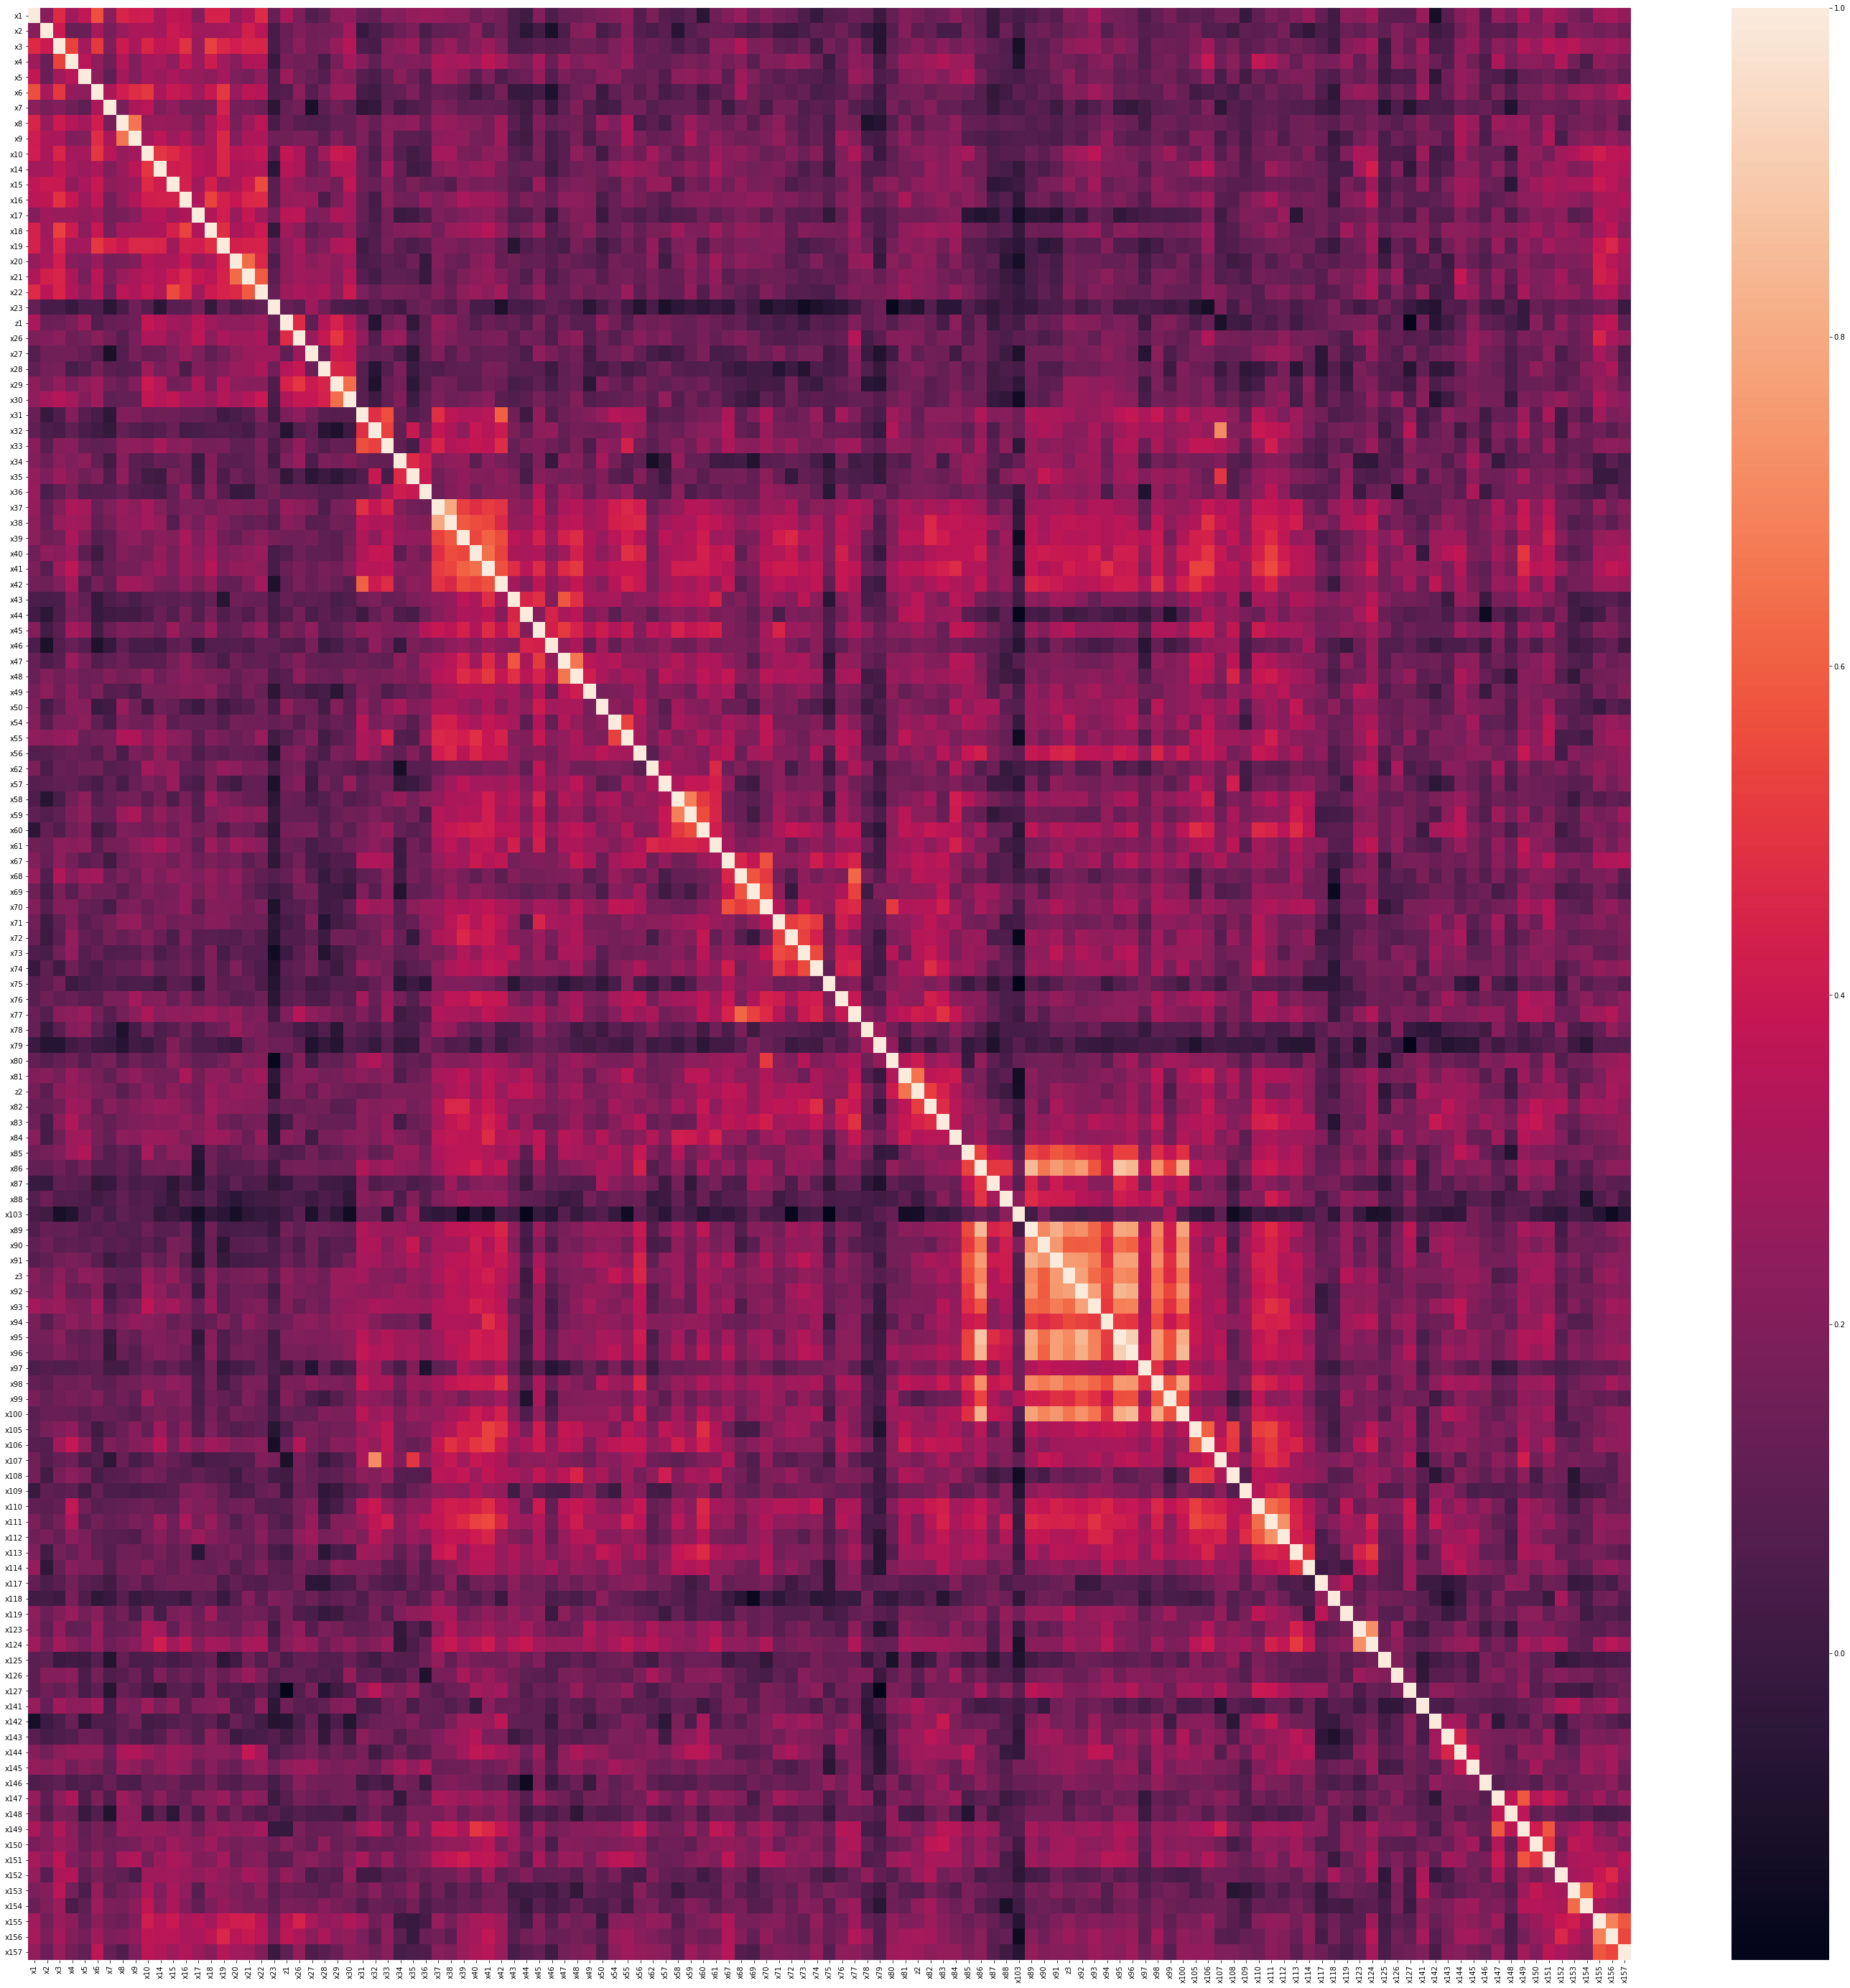

In [64]:
corrMatrix = data_2016.corr(method = 'pearson')
fig = plt.figure(figsize=(50,50))
sns.heatmap(corrMatrix, annot=False)
plt.show()

fig.savefig('output/2016_heatmap.png')

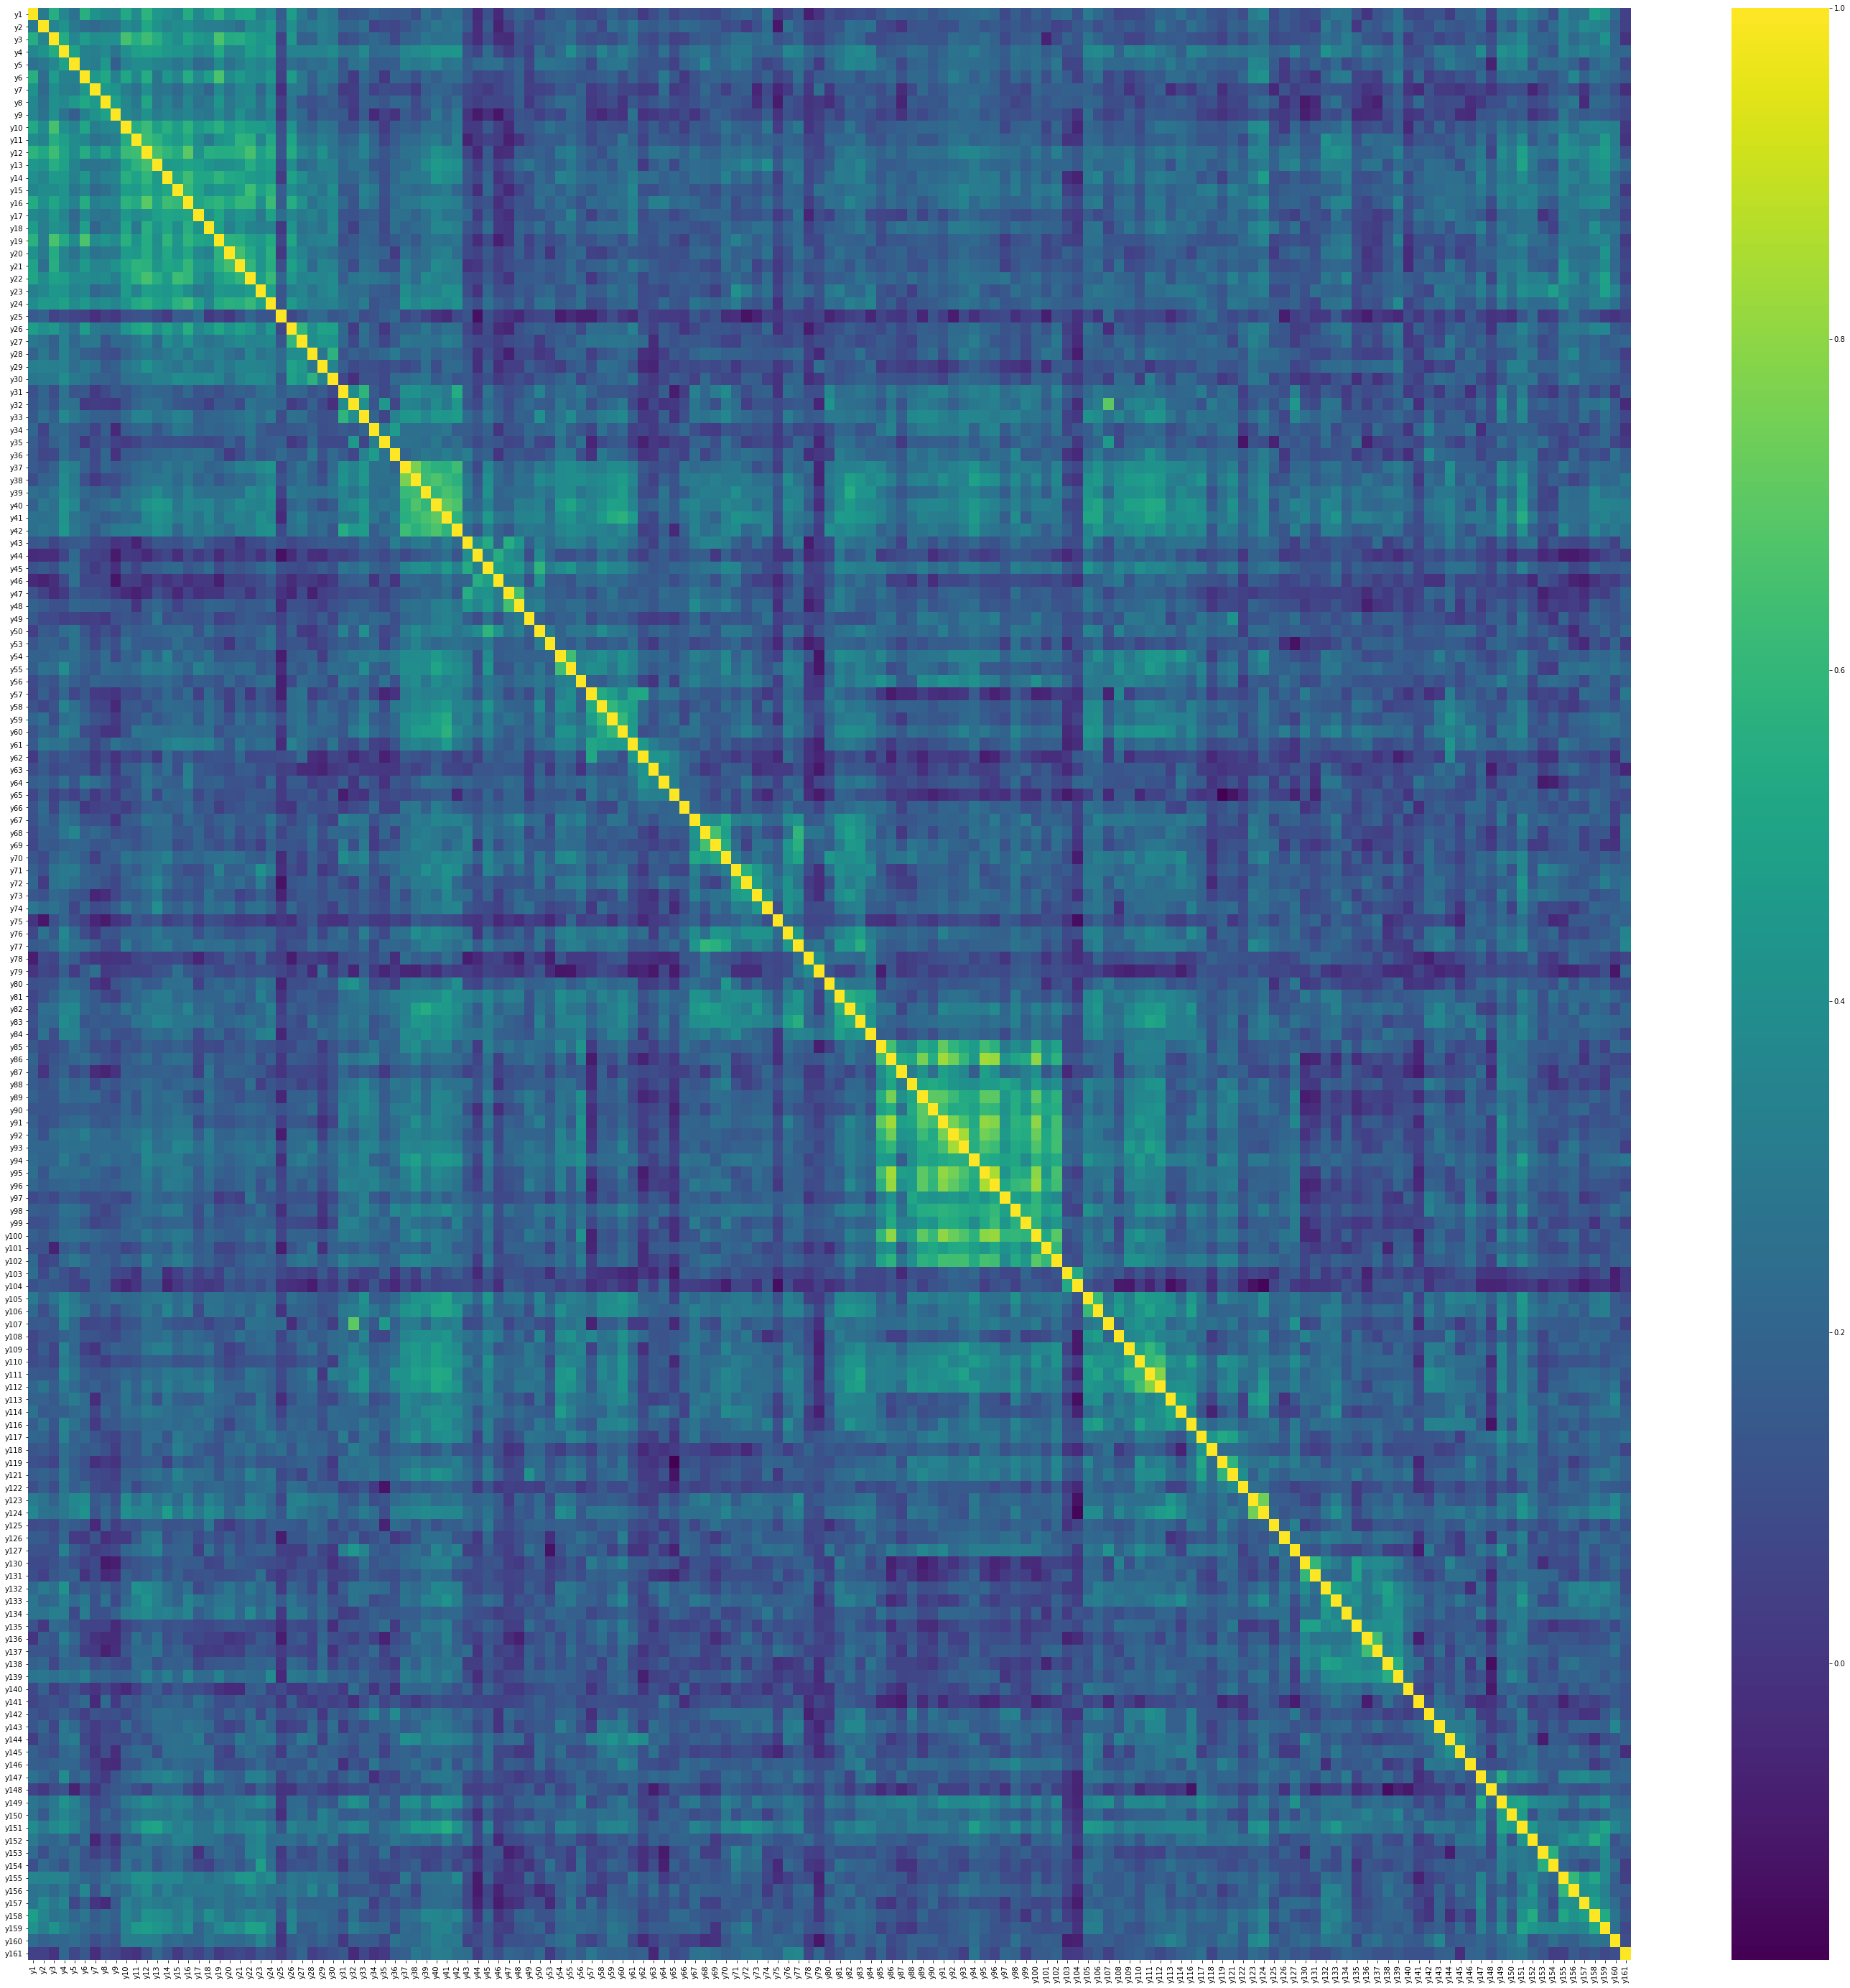

In [65]:
corrMatrix = data_2017.corr(method = 'pearson')
fig = plt.figure(figsize=(50,50))
sns.heatmap(corrMatrix, annot=False, cmap='viridis')
plt.show()

fig.savefig('output/2017_heatmap.png')